In [1]:
import pandas as pd 
import numpy as np
import seaborn as sn
import sys
import operator
import matplotlib.pyplot as plt

final = pd.read_csv("/Users/tedlinghu/Desktop/Luo_Rotation/luorotation/final.csv")

In [2]:
final = final.drop("Unnamed: 0" , axis = 1)

In [3]:
y = final['label']

In [4]:
X = final.drop('label', axis = 1)

In [5]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_idx, test_idx in split.split(X, y):
    x_train, x_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

In [6]:
x_train.shape

(27680, 17)

In [7]:
x_test.shape

(6921, 17)

In [8]:
y_train.value_counts()

ALIVE      25979
EXPIRED     1701
Name: label, dtype: int64

In [9]:
y_test.value_counts()

ALIVE      6496
EXPIRED     425
Name: label, dtype: int64

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.25, random_state = 42)

for train_idx, val_idx in split.split(x_train, y_train):
    x_train, x_val = x_train.iloc[train_idx], x_train.iloc[val_idx]
    y_train, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

In [11]:
x_train.shape

(20760, 17)

In [12]:
x_val.shape

(6920, 17)

In [13]:
y_train.value_counts()

ALIVE      19484
EXPIRED     1276
Name: label, dtype: int64

In [14]:
y_val.value_counts()

ALIVE      6495
EXPIRED     425
Name: label, dtype: int64

In [15]:
y_train.value_counts()

ALIVE      19484
EXPIRED     1276
Name: label, dtype: int64

In [16]:
from sklearn.utils import resample

alive_idx = y_train[y_train == 'ALIVE'].index
expired_idx = y_train[y_train != 'ALIVE'].index



downsample = resample(x_train.loc[alive_idx], n_samples = 1526, random_state = 42)


In [17]:
y_train_downsample = y_train.loc[downsample.index]

In [18]:
y_train_downsample

29028    ALIVE
25521    ALIVE
3788     ALIVE
24197    ALIVE
4223     ALIVE
         ...  
23911    ALIVE
27483    ALIVE
9313     ALIVE
9203     ALIVE
22756    ALIVE
Name: label, Length: 1526, dtype: object

In [19]:
downsample_labels = pd.concat([y_train_downsample, y_train.loc[expired_idx]])

In [20]:
downsample_labels.index

Int64Index([29028, 25521,  3788, 24197,  4223, 22912, 23920,  2040,  6701,
            24910,
            ...
            25539, 22225,  7523,  3982,  3797, 23896,  7036, 24665, 14538,
            30581],
           dtype='int64', length=2802)

In [22]:
downsample_df = pd.concat([downsample, x_train.loc[expired_idx]])

In [23]:
downsample_df

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
29028,62,65.9,167.6,40.0,131.0,108,65.0,0,1,0,0,0,0,1,0,0,0
25521,79,55.2,152.4,24.0,138.0,94,44.0,1,0,0,0,0,0,1,0,0,0
3788,69,71.2,182.9,10.0,138.0,54,54.0,0,1,0,0,0,0,1,0,0,0
24197,61,62.4,162.6,39.0,138.0,111,48.0,0,1,0,0,0,0,1,0,0,0
4223,77,92.0,152.4,4.0,141.0,96,53.0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23896,68,70.0,172.7,5.0,144.0,139,40.0,0,1,0,0,0,0,1,0,0,0
7036,73,91.4,157.5,42.0,138.0,106,40.0,1,0,0,0,0,0,1,0,0,0
24665,57,56.7,170.2,33.0,139.0,142,46.0,1,0,0,0,0,0,1,0,0,0
14538,52,50.8,180.3,49.0,142.0,139,40.0,0,1,0,0,0,0,1,0,0,0


In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(downsample_df, downsample_labels)

/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_val[y_val == "ALIVE"] = 0
y_val[y_val == "EXPIRED"] = 1

In [26]:
y_val

563      0
2274     0
17670    0
20656    0
4045     0
        ..
30068    0
27996    0
3115     1
5392     1
10581    1
Name: label, Length: 6920, dtype: object

In [27]:
val_pred = rf.predict(x_val)

In [28]:
val_pred[val_pred == "ALIVE"] = 0

In [29]:
val_pred[val_pred == "EXPIRED"] = 1

In [30]:
from sklearn.metrics import *

def show_metrics(pred, truth):
    print("confusion matrix", confusion_matrix(pred, truth))
    print("roc auc", roc_auc_score(pred, truth))
    print("f1", f1_score(pred, truth))
    print("precision", average_precision_score(pred, truth))
    print("recall", recall_score(pred, truth))
    print("mcc", matthews_corrcoef(pred, truth))

In [31]:
show_metrics(list(val_pred), list(y_val))

confusion matrix [[5014  210]
 [1481  215]]
roc auc 0.5432848933803346
f1 0.20273455917020272
precision 0.27814747422581204
recall 0.1267688679245283
mcc 0.15509464859643496


In [32]:
n_estimators = [1,5,10,50,100,200]
max_depth = [1,2,5,10,20,30]
min_samples_split = [2,5,10,15,50,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

In [33]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(rf, hyperF, cv = 5, scoring = "f1_weighted", return_train_score = True)

In [34]:
downsample_labels[downsample_labels == "ALIVE"] = 0

In [35]:
downsample_labels[downsample_labels == "EXPIRED"] = 1

In [36]:
grid_search.fit(downsample_df, list(downsample_labels))

/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_f

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [37]:
grid_search.cv_results_["mean_test_score"]

array([0.56971458, 0.59850387, 0.58087343, 0.59164785, 0.5821856 ,
       0.57848418, 0.56582821, 0.57912987, 0.56156394, 0.60170692,
       0.5846632 , 0.57781575, 0.56079205, 0.55313377, 0.5644188 ,
       0.58224267, 0.58674134, 0.58182168, 0.57017793, 0.5930997 ,
       0.5835508 , 0.5904278 , 0.57258715, 0.57553763, 0.5531056 ,
       0.54454472, 0.58130687, 0.58929054, 0.58491648, 0.59207382,
       0.5116827 , 0.56743505, 0.61113288, 0.58740325, 0.5822235 ,
       0.58345571, 0.52653172, 0.60032726, 0.56334909, 0.5772481 ,
       0.57220148, 0.57602323, 0.55466952, 0.54731596, 0.5710803 ,
       0.58838579, 0.58575182, 0.58153167, 0.60530145, 0.58991062,
       0.59092633, 0.58289861, 0.58188409, 0.58382626, 0.57910319,
       0.61097451, 0.5476089 , 0.57507782, 0.58166344, 0.58123344,
       0.44287484, 0.60272841, 0.6063751 , 0.59665466, 0.5705785 ,
       0.5808735 , 0.53671643, 0.56715   , 0.57010063, 0.59328605,
       0.57599554, 0.58137092, 0.53899343, 0.58897295, 0.57561

In [259]:
grid_search.best_estimator_.feature_importances_

array([1.05197515e-01, 8.19661535e-02, 5.29922391e-02, 1.48602808e-01,
       1.21608257e-01, 2.02292606e-01, 2.49384608e-01, 9.09343581e-03,
       9.55218233e-03, 0.00000000e+00, 0.00000000e+00, 8.34279106e-03,
       3.08123547e-05, 8.33272236e-03, 1.72207634e-03, 0.00000000e+00,
       8.81792385e-04])

In [260]:
downsample_df.columns

Index(['age', 'admissionweight', 'admissionheight', 'respiratoryrate',
       'sodium', 'heartrate', 'meanbp', 'gender_Female', 'gender_Male',
       'gender_Other', 'gender_Unknown', 'ethnicity_African American',
       'ethnicity_Asian', 'ethnicity_Caucasian', 'ethnicity_Hispanic',
       'ethnicity_Native American', 'ethnicity_Other/Unknown'],
      dtype='object')

In [38]:
sorted(zip(grid_search.best_estimator_.feature_importances_, downsample_df.columns))

[(0.0, 'ethnicity_Native American'),
 (0.0, 'gender_Other'),
 (0.0, 'gender_Unknown'),
 (0.0010884710496590956, 'ethnicity_Asian'),
 (0.0027251260402940698, 'ethnicity_Other/Unknown'),
 (0.004116386794745649, 'ethnicity_Hispanic'),
 (0.004561326956827826, 'ethnicity_African American'),
 (0.0064929823819860465, 'gender_Female'),
 (0.006496594029832037, 'ethnicity_Caucasian'),
 (0.007679642426821184, 'gender_Male'),
 (0.035955649796686376, 'admissionheight'),
 (0.05563679519726056, 'admissionweight'),
 (0.08608175154208986, 'age'),
 (0.11974519563072099, 'sodium'),
 (0.15526107059488312, 'respiratoryrate'),
 (0.22079887918421337, 'heartrate'),
 (0.2933601283739799, 'meanbp')]

In [39]:
new_rf = grid_search.best_estimator_

In [40]:
new_rf.predict(x_val)

array([0, 0, 0, ..., 1, 0, 0])

In [41]:
show_metrics(list(new_rf.predict(x_val)), list(y_val))

confusion matrix [[5086  178]
 [1409  247]]
roc auc 0.5576699998531637
f1 0.23738587217683804
precision 0.290297854586251
recall 0.14915458937198067
mcc 0.2049670307514166


In [42]:
y_test[y_test == "ALIVE"] = 0
y_test[y_test == "EXPIRED"] = 1

In [43]:
show_metrics(list(new_rf.predict(x_test)), list(y_test))

confusion matrix [[5044  170]
 [1452  255]]
roc auc 0.5583901797445433
f1 0.23921200750469043
precision 0.2994272036736973
recall 0.14938488576449913
mcc 0.20967884161369352


In [44]:
import keras
from keras import models
from keras import layers
import tensorflow as tf

#reshaping data

downsample_df

Using TensorFlow backend.
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/tedlinghu/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/tedlinghu/opt/anaconda3/l

,age,admissionweight,admissionheight,respiratoryrate,sodium,heartrate,meanbp,gender_Female,gender_Male,gender_Other,gender_Unknown,ethnicity_African American,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown
29028,62,65.9,167.6,40.0,131.0,108,65.0,0,1,0,0,0,0,1,0,0,0
25521,79,55.2,152.4,24.0,138.0,94,44.0,1,0,0,0,0,0,1,0,0,0
3788,69,71.2,182.9,10.0,138.0,54,54.0,0,1,0,0,0,0,1,0,0,0
24197,61,62.4,162.6,39.0,138.0,111,48.0,0,1,0,0,0,0,1,0,0,0
4223,77,92.0,152.4,4.0,141.0,96,53.0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23896,68,70.0,172.7,5.0,144.0,139,40.0,0,1,0,0,0,0,1,0,0,0
7036,73,91.4,157.5,42.0,138.0,106,40.0,1,0,0,0,0,0,1,0,0,0
24665,57,56.7,170.2,33.0,139.0,142,46.0,1,0,0,0,0,0,1,0,0,0
14538,52,50.8,180.3,49.0,142.0,139,40.0,0,1,0,0,0,0,1,0,0,0


In [45]:
downsample_tensor = downsample_df.to_numpy()
downsample_labels_tensor = downsample_labels.to_numpy()

In [46]:
print(x_val.shape)
print(y_val.shape)

x_val_tensor = x_val.to_numpy()
y_val_tensor = y_val.to_numpy()

(6920, 17)
(6920,)


In [49]:
model = models.Sequential()
model.add(layers.Dense(13, activation = 'relu', input_dim = 17))
model.add(layers.Dense(8, activation = 'relu'))
model.add(layers.Dense(3, activation = 'relu'))
model.add(layers.Dense(1, activation = "sigmoid"))

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 13)                234       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 27        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 4         
Total params: 377
Trainable params: 377
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

In [52]:
history = model.fit(downsample_tensor, downsample_labels_tensor, epochs = 100, validation_data = (x_val_tensor, y_val_tensor))

Instructions for updating:
Use tf.cast instead.
Train on 2802 samples, validate on 6920 samples
Epoch 1/100
2802/2802 [==============================] - 0s 129us/step - loss: 8.6799 - accuracy: 0.4554 - val_loss: 14.9464 - val_accuracy: 0.0614
Epoch 2/100
2802/2802 [==============================] - 0s 65us/step - loss: 3.6629 - accuracy: 0.4543 - val_loss: 0.7414 - val_accuracy: 0.7751
Epoch 3/100
2802/2802 [==============================] - 0s 68us/step - loss: 0.7001 - accuracy: 0.5653 - val_loss: 0.6812 - val_accuracy: 0.8889
Epoch 4/100
2802/2802 [==============================] - 0s 69us/step - loss: 0.6863 - accuracy: 0.5778 - val_loss: 0.7444 - val_accuracy: 0.7451
Epoch 5/100
2802/2802 [==============================] - 0s 67us/step - loss: 0.6666 - accuracy: 0.6042 - val_loss: 0.6577 - val_accuracy: 0.8490
Epoch 6/100
2802/2802 [==============================] - 0s 65us/step - loss: 0.6583 - accuracy: 0.6260 - val_loss: 0.6451 - val_accuracy: 0.8484
Epoch 7/100
2802/2802 [===

2802/2802 [==============================] - 0s 65us/step - loss: 0.6001 - accuracy: 0.6806 - val_loss: 0.5168 - val_accuracy: 0.8185
Epoch 55/100
2802/2802 [==============================] - 0s 66us/step - loss: 0.5998 - accuracy: 0.6792 - val_loss: 0.6244 - val_accuracy: 0.7380
Epoch 56/100
2802/2802 [==============================] - 0s 68us/step - loss: 0.6022 - accuracy: 0.6777 - val_loss: 0.4840 - val_accuracy: 0.8457
Epoch 57/100
2802/2802 [==============================] - 0s 67us/step - loss: 0.6012 - accuracy: 0.6770 - val_loss: 0.5015 - val_accuracy: 0.8275
Epoch 58/100
2802/2802 [==============================] - 0s 66us/step - loss: 0.6008 - accuracy: 0.6788 - val_loss: 0.7060 - val_accuracy: 0.6874
Epoch 59/100
2802/2802 [==============================] - 0s 67us/step - loss: 0.6010 - accuracy: 0.6763 - val_loss: 0.4802 - val_accuracy: 0.8348
Epoch 60/100
2802/2802 [==============================] - 0s 67us/step - loss: 0.5996 - accuracy: 0.6845 - val_loss: 0.4963 - val_a

In [53]:
history_dict = history.history

In [54]:
history_dict

{'val_loss': [14.946428078447463,
  0.7414030356214225,
  0.6812348214188063,
  0.7443535086047443,
  0.6576548652152795,
  0.6451232241757343,
  0.5935355843836172,
  0.564421632110728,
  0.6078706092917161,
  0.6569356175516382,
  0.5379233824035335,
  0.6447023189136748,
  0.6157375062821229,
  0.5634054516092201,
  0.5888901781484571,
  0.5325522314606375,
  0.5789573957465287,
  0.7000920226808228,
  0.56900163372128,
  0.6094435145400163,
  0.5834196961684034,
  0.6292779331262401,
  0.5400617944022824,
  0.6172756221253058,
  0.6840855787255171,
  0.6764786713385168,
  0.5004603226060812,
  0.5880750336398968,
  0.6496729188571776,
  0.5502642661160816,
  0.6422037837133242,
  0.6866503022998743,
  0.5573004324312155,
  0.6444863083734678,
  0.5323134620754705,
  0.4835145515513558,
  0.566933997242437,
  0.5052114470845702,
  0.5519735578856716,
  0.5735131068036735,
  0.6074249078772661,
  0.5875976010554098,
  0.6124882232247061,
  0.5573899063071763,
  0.751308734361836,
  0

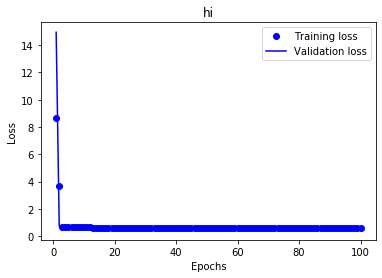

In [55]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('hi')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

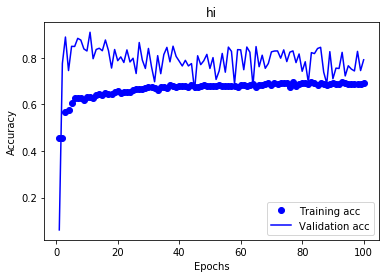

In [56]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('hi')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [57]:
x_test_tensor = x_test.to_numpy()

In [58]:
y_pred_keras = model.predict(x_test).ravel()

In [59]:
y_pred_keras[y_pred_keras >= 0.5 ]= 1
y_pred_keras[y_pred_keras < 0.5] = 0

In [60]:
y_pred_keras

array([0., 0., 0., ..., 1., 0., 1.], dtype=float32)

In [61]:
len(y_pred_keras)

6921

In [62]:
y_test

4156     0
1224     0
18287    0
22231    0
8788     0
        ..
25691    0
31760    0
11467    0
15175    0
12661    0
Name: label, Length: 6921, dtype: object

In [63]:
show_metrics(list(y_pred_keras), list(y_test))

confusion matrix [[5218  192]
 [1278  233]]
roc auc 0.559356340624698
f1 0.24070247933884298
precision 0.2691946577238247
recall 0.1542025148908008
mcc 0.20427278296717571
